In [1]:
import json
import time
from time import perf_counter
import glob
import re

def ouvrir_json(chemin):
    f = open(chemin, encoding="utf-8")
    toto = json.load(f)
    f.close()
    return toto

def ecrire_json(chemin, contenu):
    w = open(chemin, "w", encoding="utf-8")
    w.write(json.dumps(contenu, indent=2, ensure_ascii=False))
    w.close()

In [2]:
import spacy
nlp_sm = spacy.load("fr_core_news_sm")
nlp_md = spacy.load("fr_core_news_md")
nlp_lg = spacy.load("fr_core_news_lg")

In [16]:
f1 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/clean_parole_echantillon1.json")
f2 = ouvrir_json("/Users/mustapha/Documents/GitHub/Memoire/Data/voc_glaff.json")
f3 = glob.glob("/Users/mustapha/Documents/GitHub/Memoire/Data/lieux_paris/*.json")

In [35]:
start1 =time.perf_counter()
loc_sm=[]
for texte in f1:
    try:
        doc = nlp_sm(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_sm.append(entity.text)
    except:
        pass
end1 = time.perf_counter()
print("lieux trouvés par le modèle small : ",len(loc_sm))
print(set(loc_sm))
print("temps :",end1-start1)
print()
print()
start4 =time.perf_counter()
tri_1 = [mot for mot in loc_sm if mot not in f2]
test1 = [mot for mot in loc_sm if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(tri_1))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]

print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(tri_2))

print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(tri_3))
print(set(tri_3))
print()
print(set(test3))
end4 = time.perf_counter()
print("temps :",end4-start4)

ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lieux_echantillon1_aprésFiltrage_sm.json",tri_3)

lieux trouvés par le modèle small :  119
{'Rolex', 'Amsterdam', 'Calcutta', 'Marcelle', 'Euh!Euh', 'France', 'Roméo', 'Boulevard Poissonnière', 'île de la Jatte', 'Mégève', 'Millau', 'Antiatomique', 'San Francisco', 'Pénélope', 'Tintin', "Dutronc d'Isigny", 'Lampadaire', 'Mange', 'l’Harpic', 'Ministère', 'Chaussée', 'Bégueule', 'Téhéran', 'Goldwyn', 'Milo', 'Lourdes', 'Aidez', 'Daphnis', 'Disigny', 'Prends', 'Val-de-Grâce', 'Métro', 'Créteil', 'Varsovie', 'Saana', 'Papeete', 'Ouille', 'Saint Omer', 'Amiens', 'Camberra', 'Celles', 'Canigou', 'Gault', 'Pyrex', 'Mannix', 'la France', 'Bogola', 'Touche', 'Kinshassa', 'Pétuchet', 'Obélisque', 'Jekyll', 'N’', 'Lux', 'Ca', 'Cotonou', 'Trocadéro', 'Ménard', 'Dôle', 'Venez', 'Fatigué', 'Y', 'Hâtez', 'Port-Gentil', 'Bornéo', 'Marquis', 'Binningham', 'Instantané', 'Rochelle', 'rue Le Regrantier', 'Ulysse', 'Yvette', 'Houlgate', 'Bordeaux', 'Amakawogo', 'Vieux', 'Aïe!.', 'ber1ue', 'Beatniks', 'Vénus', 'Arroy', '’', 'Baltimore', 'Yaoundé', 'Tripoli

In [4]:
from wordfreq import word_frequency
mots_dansGlaff =['Celles', 'Gault', 'Lourdes', 'Touche', 'Aidez', 'Obélisque', 'Prends', 'Lux', 'Ca', 'Métro', 'Antiatomique', 'Pénélope', 'Bordeaux', 'Vieux', 'Ouille', 'Venez', 'Fatigué', 'Vénus', 'Y', 'Hâtez', 'Tripoli', 'Paris', 'Lampadaire', 'Mange', 'Marquis', 'Instantané', 'Ministère', 'Avoir', 'Chaussée', 'Bégueule']
for mot in mots_dansGlaff:
    freq = word_frequency(mot, 'fr')
    print(mot,":", freq)






Celles : 0.000117
Gault : 5.75e-07
Lourdes : 1.29e-05
Touche : 6.92e-05
Aidez : 8.71e-06
Obélisque : 6.92e-07
Prends : 7.59e-05
Lux : 2.45e-06
Ca : 0.000398
Métro : 3.89e-05
Antiatomique : 4.07e-08
Pénélope : 1.86e-06
Bordeaux : 4.79e-05
Vieux : 0.000129
Ouille : 6.03e-07
Venez : 5.25e-05
Fatigué : 1.55e-05
Vénus : 5.37e-06
Y : 0.00295
Hâtez : 2e-07
Tripoli : 2.95e-06
Paris : 0.000513
Lampadaire : 1.1e-06
Mange : 3.55e-05
Marquis : 1.29e-05
Instantané : 2.63e-06
Ministère : 8.13e-05
Avoir : 0.0012
Chaussée : 1.38e-05
Bégueule : 6.31e-08


In [8]:
print("paris :",(0.311999057346848 + 0.855361321501939 + 1.69800885006041)/3)
print("tripoli :",(0.311999057346848 + 0.545975311596982 + 0.224114836480496)/3)
print("lourdes :",(24.6825920923284 + 21.0746470276435 + 12.0431816044679)/3)
print("bordeaux :",(1.0053302958954 + 1.31034074783276 + 2.96932219294265)/3)

paris : 0.9551230763030656
tripoli : 0.36069640180810864
lourdes : 19.266806908146602
bordeaux : 1.7616644122236031


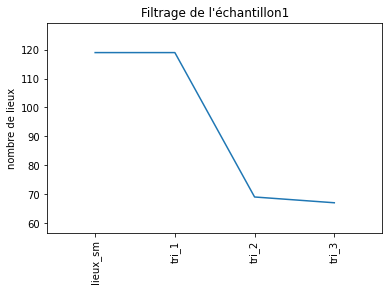

In [23]:
import matplotlib.pyplot as plt


x = [1, 2, 3, 4]
y = [119, 119, 69, 67]
labels = ['lieux_sm', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon1")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [36]:
start2 =time.perf_counter()
loc_md=[]
for texte in f1:
    try:
        doc = nlp_md(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_md.append(entity.text)
    except:
        pass
end2 = time.perf_counter()

print("lieux trouvés par le modèle medium : ",len(set(loc_md)))
print(set(loc_md))
print("temps :",end2-start2)
print()
print()
start5 =time.perf_counter()

tri_1 = [mot for mot in loc_md if mot not in f2]
test1 = [mot for mot in loc_md if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
end5 = time.perf_counter()
print("temps :",end5-start5)
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lieux_echantillon1_aprésFiltrage_md.json",tri_3)

lieux trouvés par le modèle medium :  71
{'Téhéran', 'Milo', 'Celles', 'Canigou', 'Amsterdam', 'Pyrex', 'Lourdes', 'la France', 'Calcutta', 'Réserve', 'France', 'Kinshassa', 'Pétuchet', 'Boulevard Poissonnière', 'Obélisque', 'rue Le Regrantier', 'Val-de-Grâce', 'Mégève', 'Croyez', 'Demi-ton', 'Ca', 'Harpic', 'la Rochelle', 'Créteil', 'Caleçons', 'Millau', 'Varsovie', 'Cotonou', 'Demi-tour', 'He!He', 'San Francisco', 'Houlgate', 'Électrique', 'Saana', 'Bordeaux', 'Papeete', 'Dôle', 'Trocadéro', 'Aïe!.', 'Saint Omer', 'Demi-sourires', 'Refrain}', 'refrain}.', 'Akékéké kékéké', 'Vénus', 'Baltimore', 'Nickelés', 'Bonsoir', 'Yaoundé', 'Port-Gentil', 'Amiens', 'Tripoli', 'Électronique', 'Bernhart', 'Cigare!.', 'Prrr!Prrr', 'Maxitère', 'Paris', 'Refrain}.', 'Bornéo', 'Venise', "Bouquin'", 'Saint-Tropez', 'le Métropolitain', 'Castel', 'Camaret', 'Binningham', 'Chaussée', 'Bégueule', 'Tampico', 'Demi-soupir'}
temps : 1.2520183759988868


nombre lieux qui ne se trouvent pas dans le Glaff :  71
{

In [ ]:
print("paris :",(0.311999057346848 + 0.855361321501939 + 1.69800885006041)/3)
print("tripoli :",(0.311999057346848 + 0.545975311596982 + 0.224114836480496)/3)
print("lourdes :",(24.6825920923284 + 21.0746470276435 + 12.0431816044679)/3)
print("bordeaux :",(1.0053302958954 + 1.31034074783276 + 2.96932219294265)/3)

In [5]:
mots_dansGlaff =['Électrique', 'Celles', 'Bordeaux', 'Électronique', 'Paris', 'Lourdes', 'Bégueule', 'Croyez', 'Ca', 'Réserve', 'Nickelés', 'Vénus', 'Caleçons', 'Castel', 'Obélisque', 'Chaussée', 'Bonsoir', 'Tripoli']
for mot in mots_dansGlaff:
    freq = word_frequency(mot, 'fr')
    print(mot,":", freq)

Électrique : 4.47e-05
Celles : 0.000117
Bordeaux : 4.79e-05
Électronique : 2.75e-05
Paris : 0.000513
Lourdes : 1.29e-05
Bégueule : 6.31e-08
Croyez : 2.57e-05
Ca : 0.000398
Réserve : 5.37e-05
Nickelés : 2.63e-07
Vénus : 5.37e-06
Caleçons : 6.76e-07
Castel : 2.04e-06
Obélisque : 6.92e-07
Chaussée : 1.38e-05
Bonsoir : 1.74e-05
Tripoli : 2.95e-06


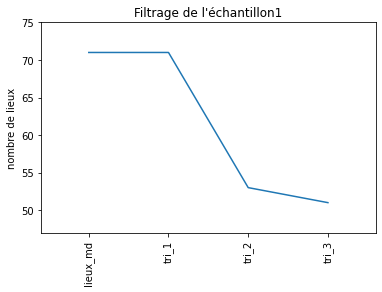

In [25]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [71, 71, 53, 51]
labels = ['lieux_md', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon1")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()



In [42]:
start3 =time.perf_counter()
loc_lg=[]
for texte in f1:
    try:
        doc = nlp_lg(texte)
        for entity in doc.ents:
            if entity.label_ =="LOC":
                loc_lg.append(entity.text)
    except:
        pass
end3 =time.perf_counter()
print("lieux trouvés par le modèle medium : ",len(set(loc_lg)))
print(set(loc_lg))
print("temps :",end3-start3)
print()
print()
start6 =time.perf_counter()
tri_1 = [mot for mot in loc_lg if mot not in f2]
test1 = [mot for mot in loc_lg if mot in f2]
print("nombre lieux qui ne se trouvent pas dans le Glaff : ", len(set(tri_1)))
print(set(tri_1))
print()
print(set(test1))
print()

tri_2 = [mot for mot in tri_1 if mot.lower() not in f2]
test2 = [mot for mot in tri_1 if mot.lower() in f2]
print("nombre lieux en miniscules qui ne se trouvent pas dans le Glaff : ",len(set(tri_2)))
print(set(tri_2))
print()
print(set(test2))
print()



tri_3 =[mot for mot in tri_2 if mot.lower() not in tri_2] 
test3 =set(tri_2).difference(tri_3)
print("nombre de lieux obtenu dans la liste finale : ", len(set(tri_3)))
print(set(tri_3))
print()
print(set(test3))
end6 = time.perf_counter()
print("temps :",end6-start6)
ecrire_json("/Users/mustapha/Documents/GitHub/Memoire/clean_data_echantillons/lieux_echantillon1_aprésFiltrage_lg.json",tri_3)

lieux trouvés par le modèle medium :  64
{'Téhéran', 'Milo', 'Celles', 'Canigou', 'Amsterdam', 'Pyrex', 'Lourdes', 'la France', 'Calcutta', 'France', 'Pétuchet', 'Boulevard Poissonnière', 'Obélisque', 'rue Le Regrantier', 'île de la Jatte', 'Val-de-Grâce', 'Mégève', 'Ca', 'Harpic', 'He!Hee!Ils', 'la Rochelle', 'Akékékéké', 'Oh!Ooh!Quand', 'Créteil', 'Caleçons', 'Millau', 'Varsovie', 'Cotonou', 'Demi-tour', 'He!He', 'San Francisco', 'Houlgate', 'Saana', 'Bordeaux', 'Papeete', 'Dôle', 'Trocadéro', 'Saint Omer', 'Demi-sourires', 'Beatniks', 'Vénus', 'Baltimore', 'Yaoundé', 'Port-Gentil', 'Amiens', 'Tripoli', 'Cigare!.', 'Prrr!Prrr', 'Maxitère', 'Paris', 'Lampadaire', 'Bornéo', 'Déformante', 'Venise', "Bouquin'", 'Saint-Tropez', 'Akéké', 'Camaret', 'Ministère', 'Binningham', 'Chaussée', "Parc'", 'Tampico', 'Demi-soupir'}
temps : 1.2121064469974954


nombre lieux qui ne se trouvent pas dans le Glaff :  64
{'Téhéran', 'Milo', 'Celles', 'Canigou', 'Amsterdam', 'Pyrex', 'Lourdes', 'la France',

In [6]:
mots_dansGlaff =['Celles', 'Bordeaux', 'Paris', 'Lampadaire', 'Lourdes', 'Déformante', 'Ca', 'Vénus', 'Caleçons', 'Ministère', 'Obélisque', 'Chaussée', 'Tripoli']
for mot in mots_dansGlaff:
    freq = word_frequency(mot, 'fr')
    print(mot,":", freq)

Celles : 0.000117
Bordeaux : 4.79e-05
Paris : 0.000513
Lampadaire : 1.1e-06
Lourdes : 1.29e-05
Déformante : 3.24e-08
Ca : 0.000398
Vénus : 5.37e-06
Caleçons : 6.76e-07
Ministère : 8.13e-05
Obélisque : 6.92e-07
Chaussée : 1.38e-05
Tripoli : 2.95e-06


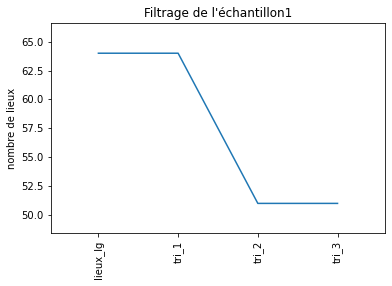

In [27]:
x = [1, 2, 3, 4]
y = [64, 64, 51, 51]
labels = ['lieux_lg', 'tri_1', 'tri_2', 'tri_3']

plt.plot(x, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labels, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
plt.title("Filtrage de l'échantillon1")
plt.ylabel("nombre de lieux")
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

In [9]:
lieux_paris = []
for fichier in f3:
    lp = ouvrir_json(fichier)
    for lieu in lp:
        lieux_paris.append(lieu)